In [2]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

# In this notebook Pyridine is made and solved with RHF, huckel and EHT


## RHF

In [3]:
Pyridine ="""
  C    1.1876995   -0.7009823    0.0000000
  C    1.2084719    0.6964269    0.0000000
  C    0.0000000    1.3969287   -0.0000000
  C   -1.2084719    0.6964269   -0.0000000
  C   -1.1876995   -0.7009823   -0.0000000
  N   -0.0000000   -1.3644574    0.0000000
  H    2.1152123   -1.2577675    0.0000000
  H    2.1502427    1.2297766    0.0000000
  H    0.0000000    2.4792591   -0.0000000
  H   -2.1502427    1.2297766   -0.0000000
  H   -2.1152123   -1.2577675   -0.0000000
  """

In [7]:
extra_bounds = [(0,5)]
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(Pyridine))
print(coordinates)

[[ 1.1876995 -0.7009823]
 [ 1.2084719  0.6964269]
 [ 0.         1.3969287]
 [-1.2084719  0.6964269]
 [-1.1876995 -0.7009823]
 [-0.        -1.3644574]]


In [4]:

Pyridine_molecule = gto.M(atom=Pyridine, basis='6-311++G**')#'sto-6g''ccpvdz'

pz_indices = pts.taking_indices(Pyridine_molecule, ['C 2pz', 'N 2pz'])

print(pz_indices)
hf = scf.RHF(Pyridine_molecule)
hf_energy = hf.kernel()

[7, 29, 51, 73, 95, 117]
converged SCF energy = -246.745468789964


In [6]:
print(Pyridine_molecule.ao_labels())

['0 C 1s    ', '0 C 2s    ', '0 C 3s    ', '0 C 4s    ', '0 C 5s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '0 C 3px   ', '0 C 3py   ', '0 C 3pz   ', '0 C 4px   ', '0 C 4py   ', '0 C 4pz   ', '0 C 5px   ', '0 C 5py   ', '0 C 5pz   ', '0 C 3dxy  ', '0 C 3dyz  ', '0 C 3dz^2 ', '0 C 3dxz  ', '0 C 3dx2-y2', '1 C 1s    ', '1 C 2s    ', '1 C 3s    ', '1 C 4s    ', '1 C 5s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '1 C 3px   ', '1 C 3py   ', '1 C 3pz   ', '1 C 4px   ', '1 C 4py   ', '1 C 4pz   ', '1 C 5px   ', '1 C 5py   ', '1 C 5pz   ', '1 C 3dxy  ', '1 C 3dyz  ', '1 C 3dz^2 ', '1 C 3dxz  ', '1 C 3dx2-y2', '2 C 1s    ', '2 C 2s    ', '2 C 3s    ', '2 C 4s    ', '2 C 5s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '2 C 3px   ', '2 C 3py   ', '2 C 3pz   ', '2 C 4px   ', '2 C 4py   ', '2 C 4pz   ', '2 C 5px   ', '2 C 5py   ', '2 C 5pz   ', '2 C 3dxy  ', '2 C 3dyz  ', '2 C 3dz^2 ', '2 C 3dxz  ', '2 C 3dx2-y2', '3 C 1s    ', '3 C 2s    ', '3 C 3s    ', '3 C 4s    ', '3 C 5s    ', '3

In [8]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)

In [32]:
mo_eigenvalues = hf.mo_energy[[16, 19, 20, 26, 27, 28, 31, 32, 38, 41, 48, 51, 65, 69, 70, 72, 73, 87, 89, 92, 94, 95, 96, 98, 103, 105, 109, 110, 112, 116, 120, 121, 123, 126, 130, 137, 140, 141, 143, 146, 154]]
print(mo_eigenvalues)
pz_AO_MO = mo_coeff[[7, 10, 13, 16, 18, 20, 29, 32, 35, 38, 40, 42, 51, 54, 57, 60, 62, 73, 76, 79, 82, 84, 86, 95, 98, 101, 104, 106, 108, 117, 120, 123, 126, 128, 138, 145, 152, 159, 166]][:, [16, 19, 20, 26, 27, 28, 31, 32, 38, 41, 48, 51, 65, 69, 70, 72, 73, 87, 89, 92, 94, 95, 96, 98, 103, 105, 109, 110, 112, 116, 120, 121, 123, 126, 130, 137, 140, 141, 143, 146, 154]]


print(pz_AO_MO)

pz_AO_MO = mo_coeff[pz_indices][:, [16, 19, 20, 26, 27, 28, 31, 32, 38, 41, 48, 51, 65, 69, 70, 72, 73, 87, 89, 92, 94, 95, 96, 98, 103, 105, 109, 110, 112, 116, 120, 121, 123, 126, 130, 137, 140, 141, 143, 146, 154]]
print(pz_AO_MO)

[-0.5346022  -0.37818339 -0.35030168  0.08743902  0.10281489  0.1170056
  0.14648785  0.14758172  0.20017459  0.21090091  0.3148924   0.35274708
  0.71714761  0.74415255  0.76546614  0.80867193  0.83488139  1.12993316
  1.19164909  1.26203774  1.31028775  1.34839724  1.4272233   1.57148265
  1.81632936  1.87574372  1.98595847  2.04434682  2.06987009  2.2203699
  2.34571829  2.40804958  2.4745915   2.72242115  2.89526526  3.0829557
  3.20299986  3.21935582  3.2878001   3.40006888  4.40305549]
[[ 0.17540958 -0.07813798 -0.18870799 ...  0.28703661 -0.15622342
   0.0260007 ]
 [ 0.30323575 -0.13308505 -0.32789227 ... -0.38006534  0.21862729
  -0.04058847]
 [ 0.21708739 -0.13461783 -0.30377974 ...  0.21568673 -0.13766885
   0.0848516 ]
 ...
 [ 0.00992548  0.01795311 -0.         ...  0.          0.01521918
  -0.00417446]
 [ 0.01030263  0.01080175  0.01570245 ...  0.01025062 -0.01123869
   0.01316883]
 [ 0.01237235 -0.0058387   0.01517722 ... -0.01754778  0.01385012
  -0.01553198]]
[[ 1.754095

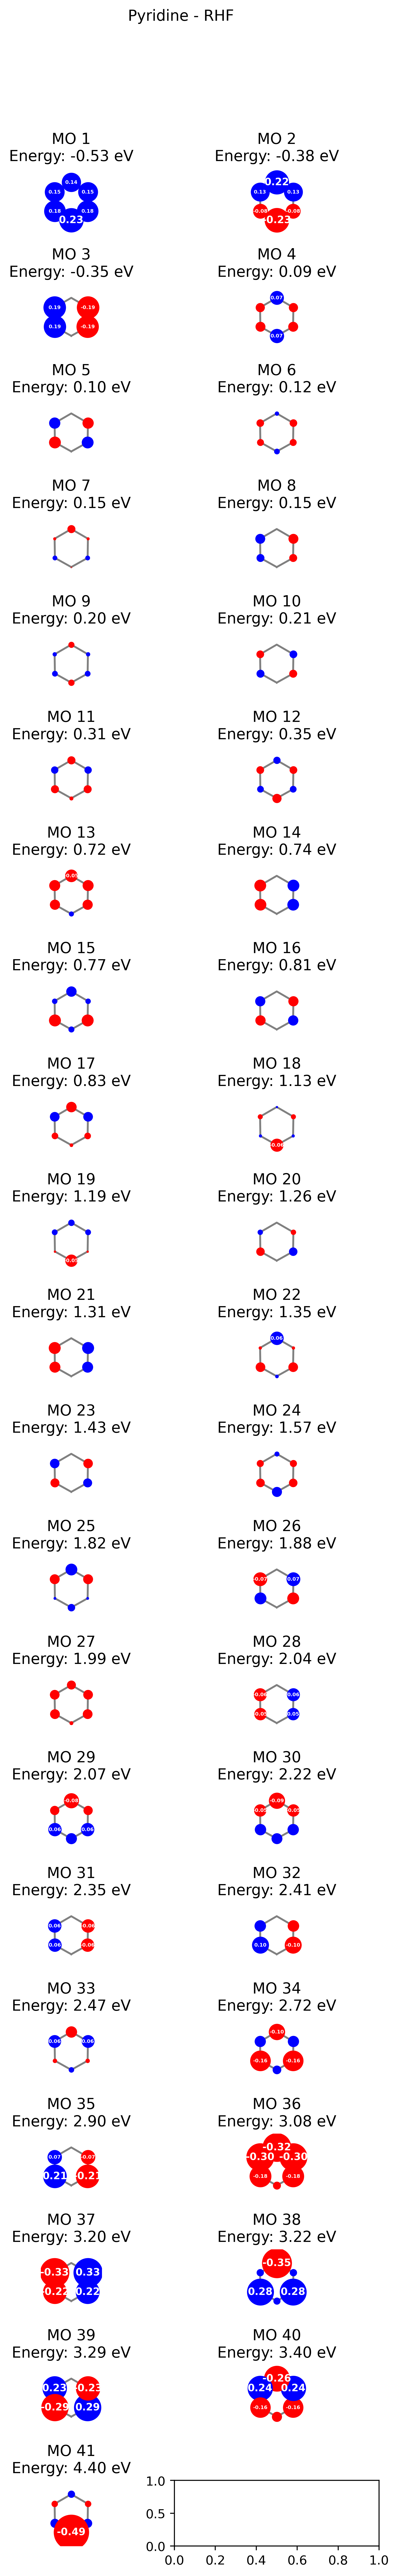

In [22]:
pts.plot_MOs(mo_eigenvalues, pz_AO_MO, coordinates, extra_bounds, 'Pyridine', 'RHF', fig_size = (5,30))

In [240]:



Pyridine_molecule = gto.M(atom=Pyridine, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = pts.taking_indices(Pyridine_molecule, ['C 2pz', 'N 2pz'])
print(pz_indices)
hf = scf.RHF(Pyridine_molecule)
hf_energy = hf.kernel()

[[ 1.1876995 -0.7009823]
 [ 1.2084719  0.6964269]
 [ 0.         1.3969287]
 [-1.2084719  0.6964269]
 [-1.1876995 -0.7009823]
 [-0.        -1.3644574]]
[4, 9, 14, 19, 24, 29]


converged SCF energy = -243.632985713889


In [241]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)

In [265]:
mo_eigenvalues = hf.mo_energy[[16,19,20,21,22,23]]
print(mo_eigenvalues)
pz_AO_MO = mo_coeff[pz_indices][:,[16,19,20,21,22,23]]
print(pz_AO_MO)

[-0.48414207 -0.31210177 -0.29872478  0.2431793   0.24810985  0.47861945]
[[ 0.42961567 -0.25540568 -0.50607697 -0.3022446  -0.4965454   0.39800619]
 [ 0.37569318  0.31965726 -0.49384825 -0.27510811  0.5034309  -0.4203166 ]
 [ 0.36324693  0.58744315 -0.          0.58140996 -0.          0.42235429]
 [ 0.37569318  0.31965726  0.49384825 -0.27510811 -0.5034309  -0.4203166 ]
 [ 0.42961567 -0.25540568  0.50607697 -0.3022446   0.4965454   0.39800619]
 [ 0.46542636 -0.56576045  0.          0.57261673 -0.         -0.3891875 ]]


In [243]:
D = pts.making_D(pz_AO_MO, 6)
print(D)

[[ 1.01183117  0.65937325  0.0120405  -0.34032767 -0.01262444  0.68890578]
 [ 0.65937325  0.97442446  0.64849973 -0.00111993 -0.34032767 -0.01198385]
 [ 0.0120405   0.64849973  0.95407557  0.64849973  0.0120405  -0.32657482]
 [-0.34032767 -0.00111993  0.64849973  0.97442446  0.65937325 -0.01198385]
 [-0.01262444 -0.34032767  0.0120405   0.65937325  1.01183117  0.68890578]
 [ 0.68890578 -0.01198385 -0.32657482 -0.01198385  0.68890578  1.07341316]]


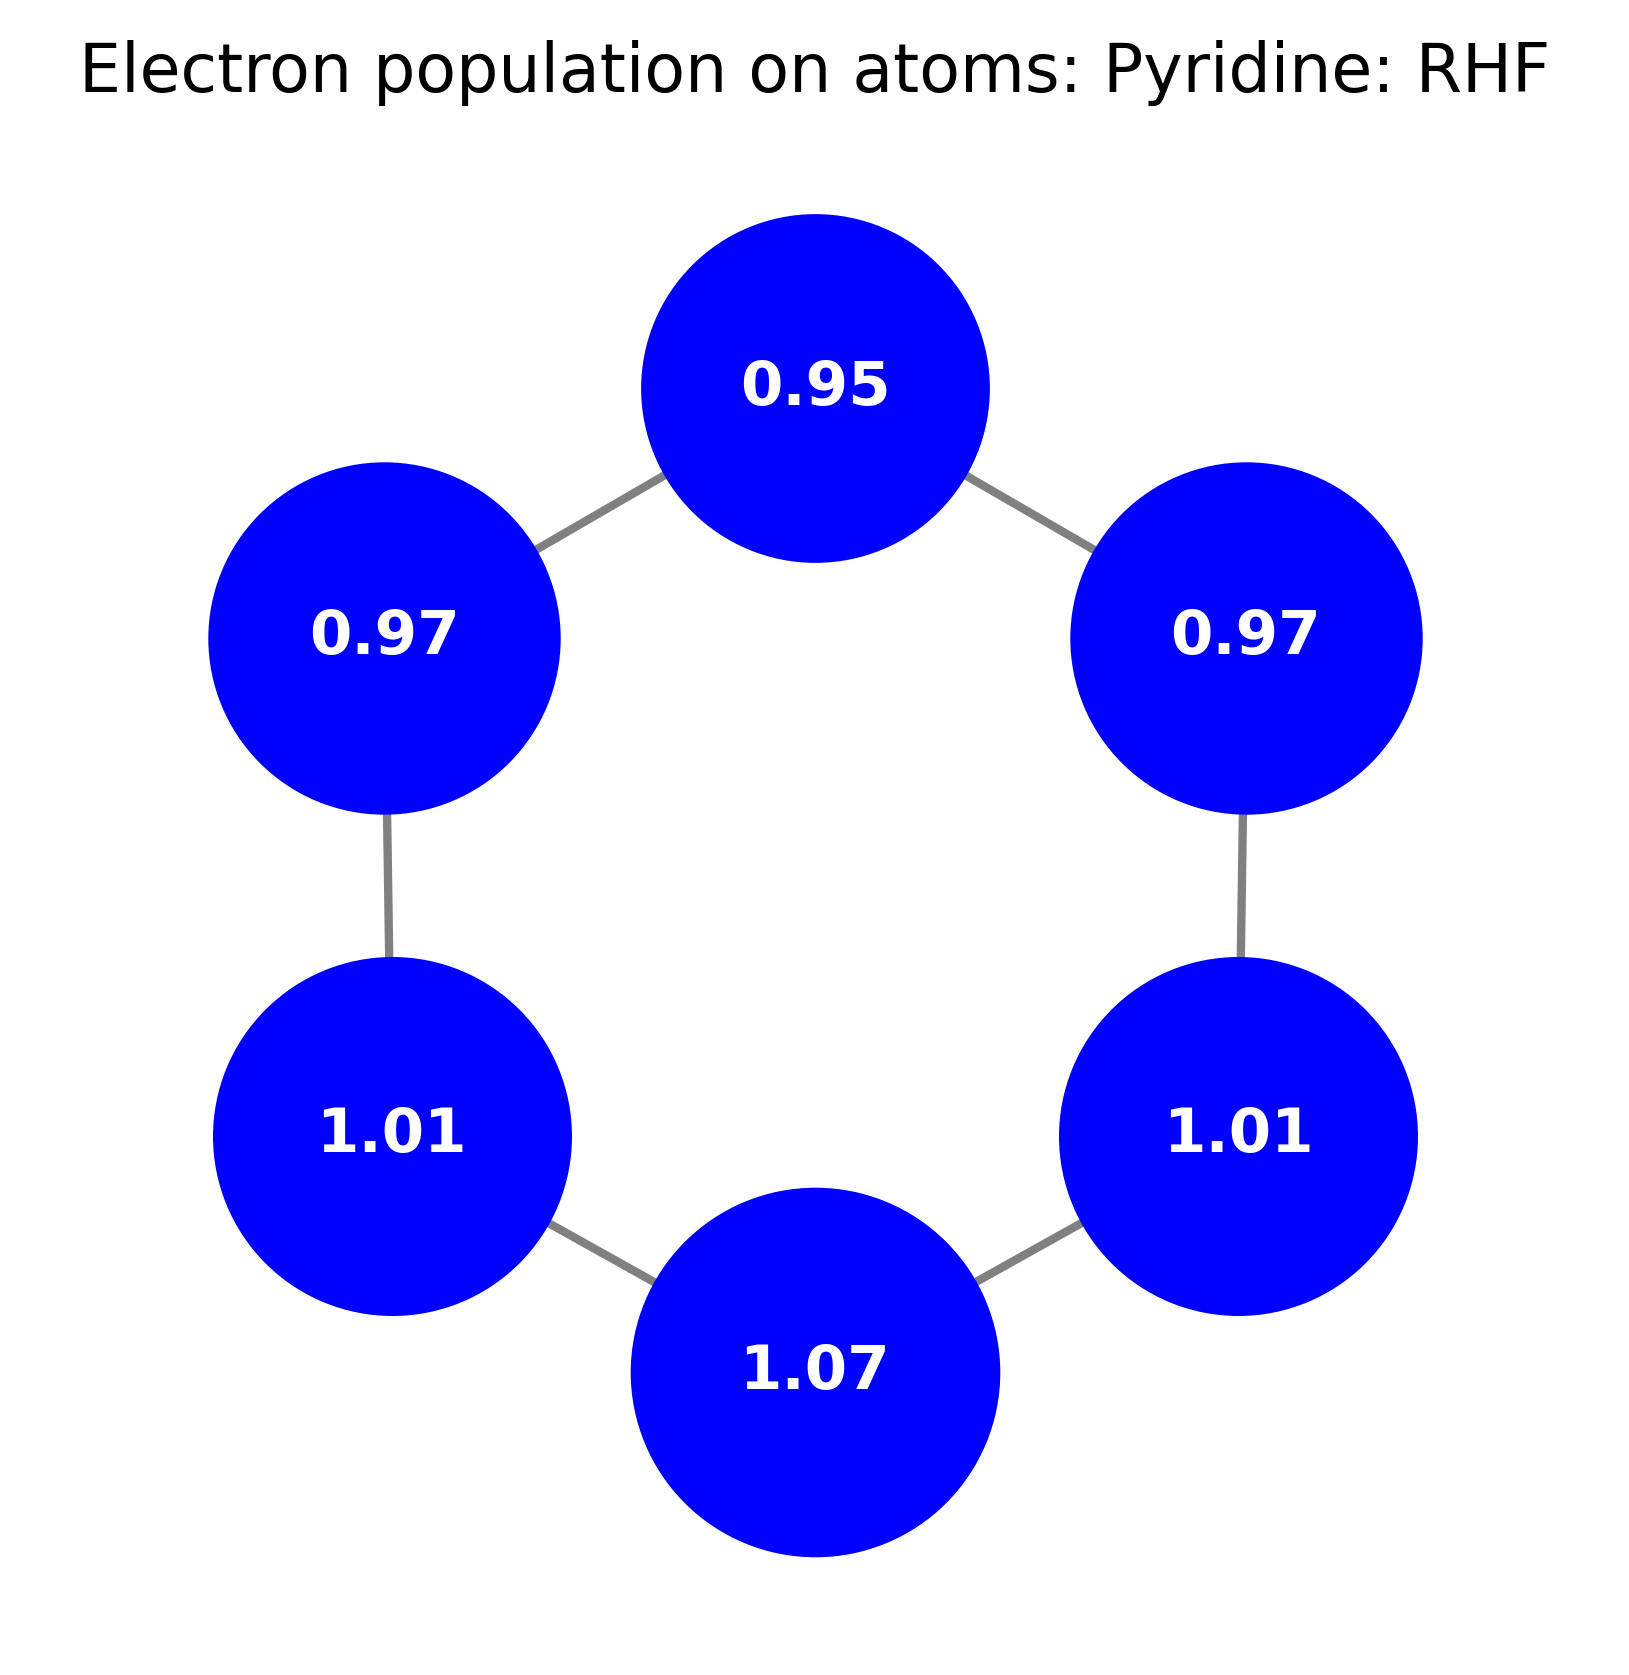

In [244]:
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D, 'Pyridine', 'RHF')

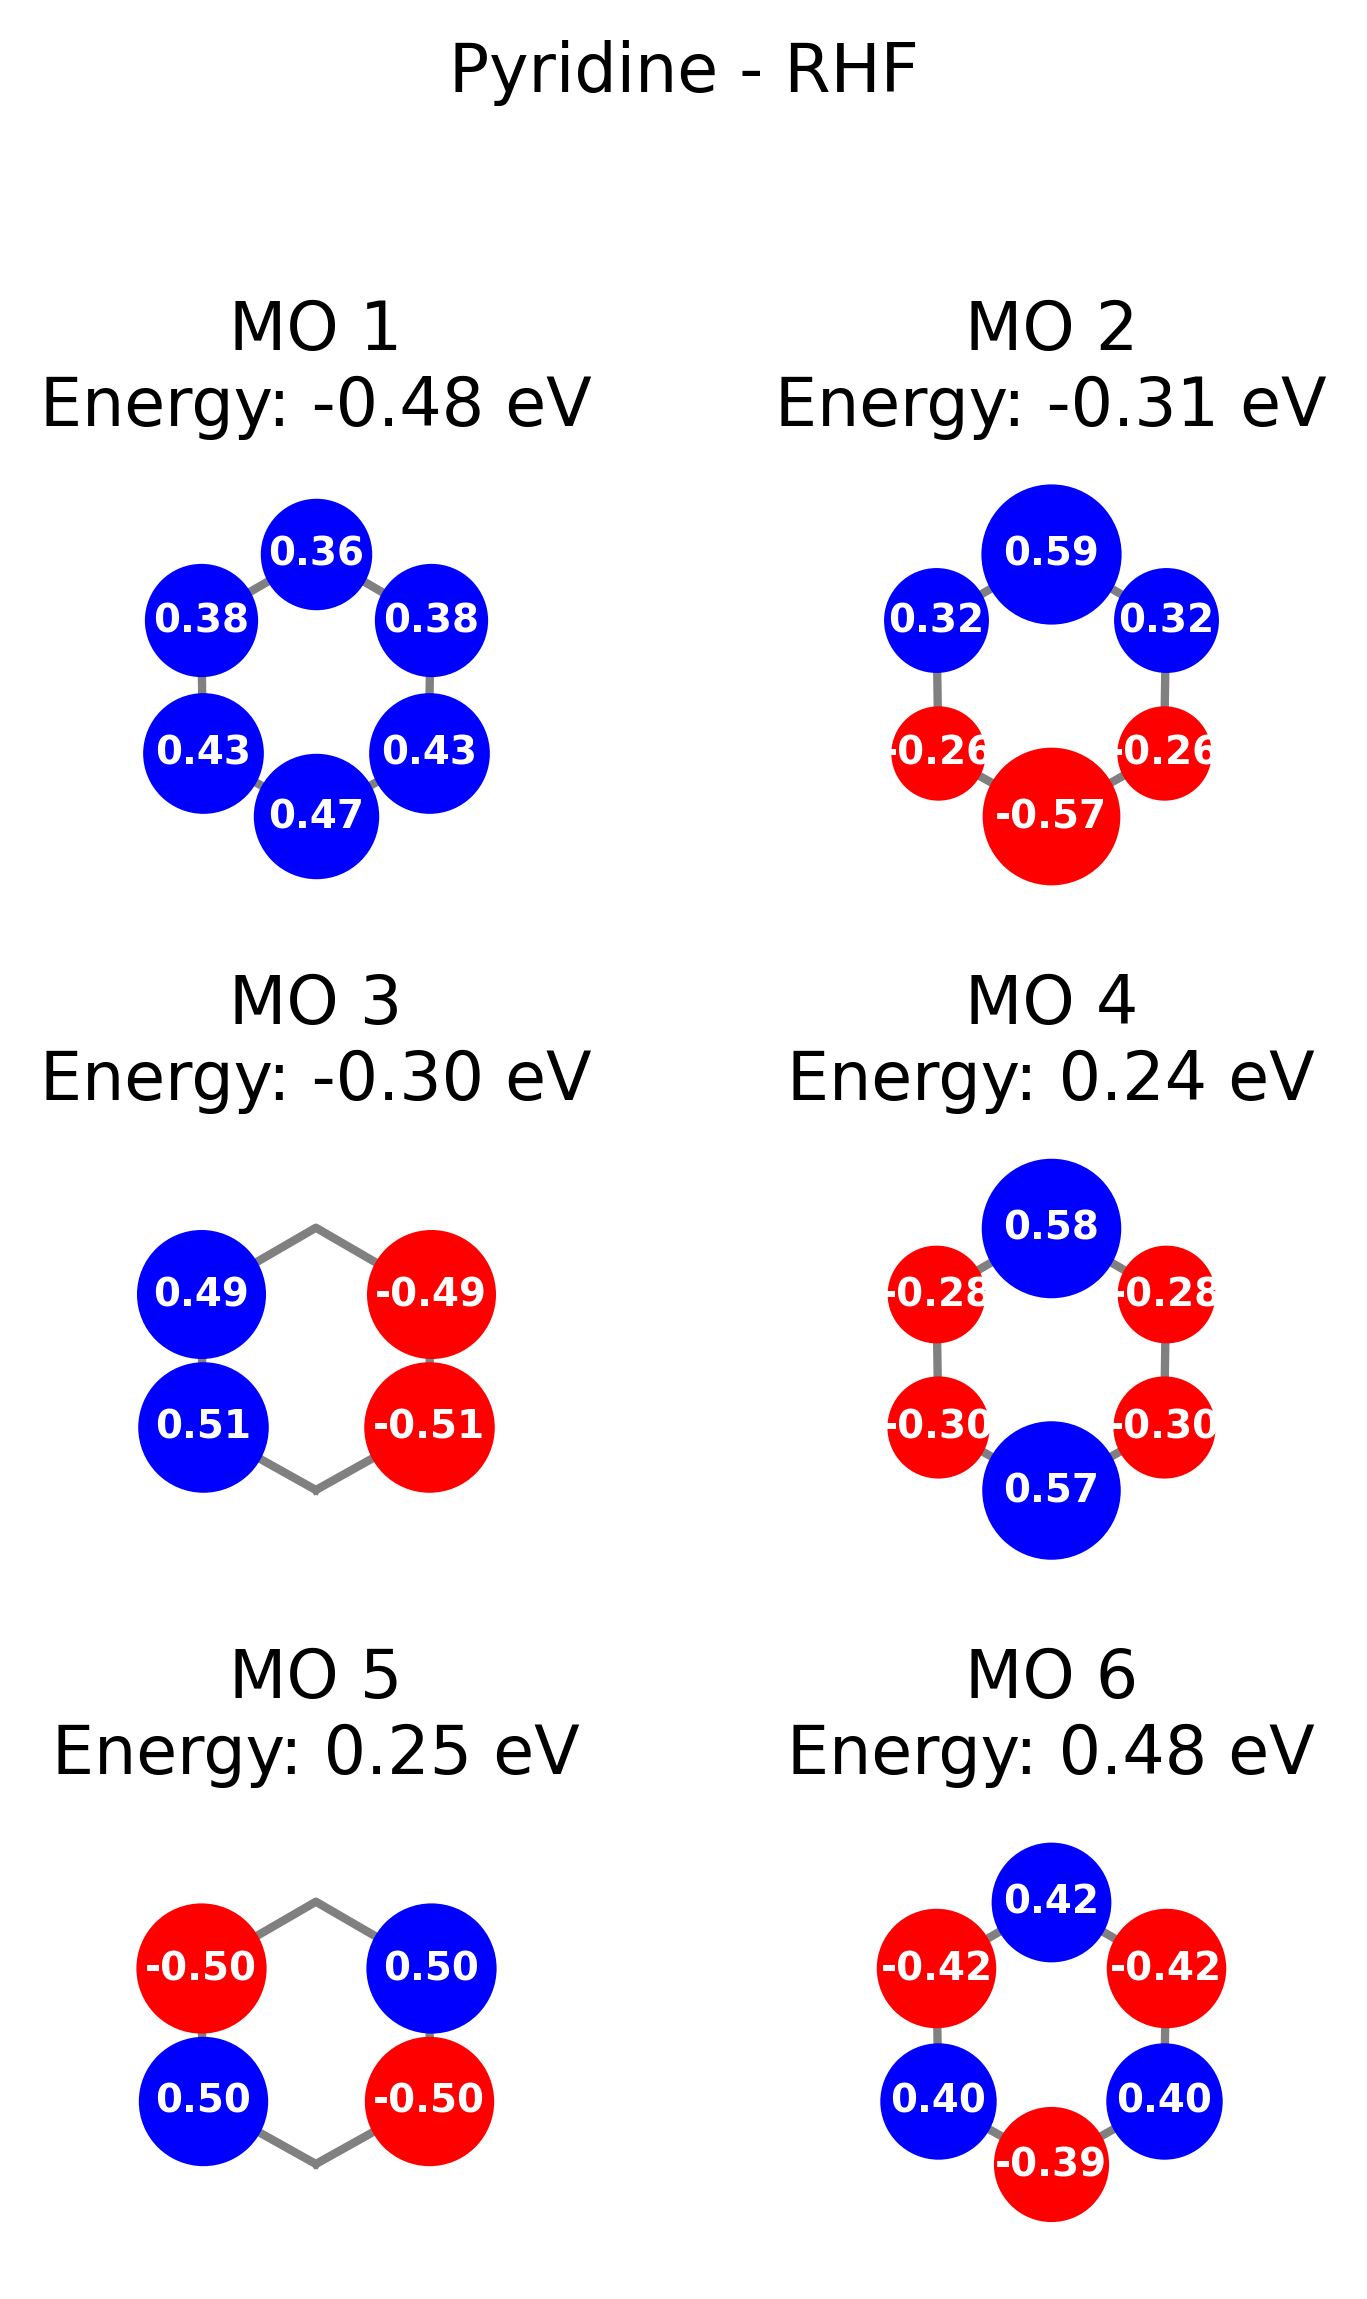

In [245]:
pts.plot_MOs(mo_eigenvalues, pz_AO_MO, coordinates, extra_bounds, 'Pyridine', 'RHF', fig_size = (4,6))

## Hückel

In [246]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
N = -0.15
NC = -0.1
pyridine_huckel = huckel(6, -0.09, -0.1)
pyridine_huckel.create_matrix()
for r, k in [(0,5), (4,5)]:
    pyridine_huckel.huckel_matrix[r][k] = NC
    pyridine_huckel.huckel_matrix[k][r] = NC
pyridine_huckel.huckel_matrix[5][5] = N
huc_mat = pyridine_huckel.huckel_matrix
print(huc_mat)

[[-0.09 -0.1   0.    0.    0.   -0.1 ]
 [-0.1  -0.09 -0.1   0.    0.    0.  ]
 [ 0.   -0.1  -0.09 -0.1   0.    0.  ]
 [ 0.    0.   -0.1  -0.09 -0.1   0.  ]
 [ 0.    0.    0.   -0.1  -0.09 -0.1 ]
 [-0.1   0.    0.    0.   -0.1  -0.15]]


In [247]:
pyridine_huckel.solve_huckel_matrix()
eigval = pyridine_huckel.eigenvalues
eigvec = pyridine_huckel.eigenvectors.round(6)

print(eigval)
print(eigvec)

[-0.303588 -0.209946 -0.19     -0.008836  0.01      0.102369]
[[-0.419031  0.169128 -0.5      -0.37896  -0.5       0.390125]
 [-0.349341 -0.36141  -0.5      -0.229326  0.5      -0.441309]
 [-0.327117 -0.602623 -0.        0.565091 -0.        0.458815]
 [-0.349341 -0.36141   0.5      -0.229326 -0.5      -0.441309]
 [-0.419031  0.169128  0.5      -0.37896   0.5       0.390125]
 [-0.545658  0.564271  0.        0.536907 -0.       -0.309171]]


In [248]:
D_huckel = pts.making_D(eigvec, 6)
print(D_huckel)

[[ 0.90838252  0.67052032  0.07030348 -0.32947968 -0.09161748  0.64816329]
 [ 0.67052032  1.00531264  0.66413872  0.00531264 -0.32947968 -0.02662494]
 [ 0.07030348  0.66413872  0.94032002  0.66413872  0.07030348 -0.32309735]
 [-0.32947968  0.00531264  0.66413872  1.00531264  0.67052032 -0.02662494]
 [-0.09161748 -0.32947968  0.07030348  0.67052032  0.90838252  0.64816329]
 [ 0.64816329 -0.02662494 -0.32309735 -0.02662494  0.64816329  1.23228883]]


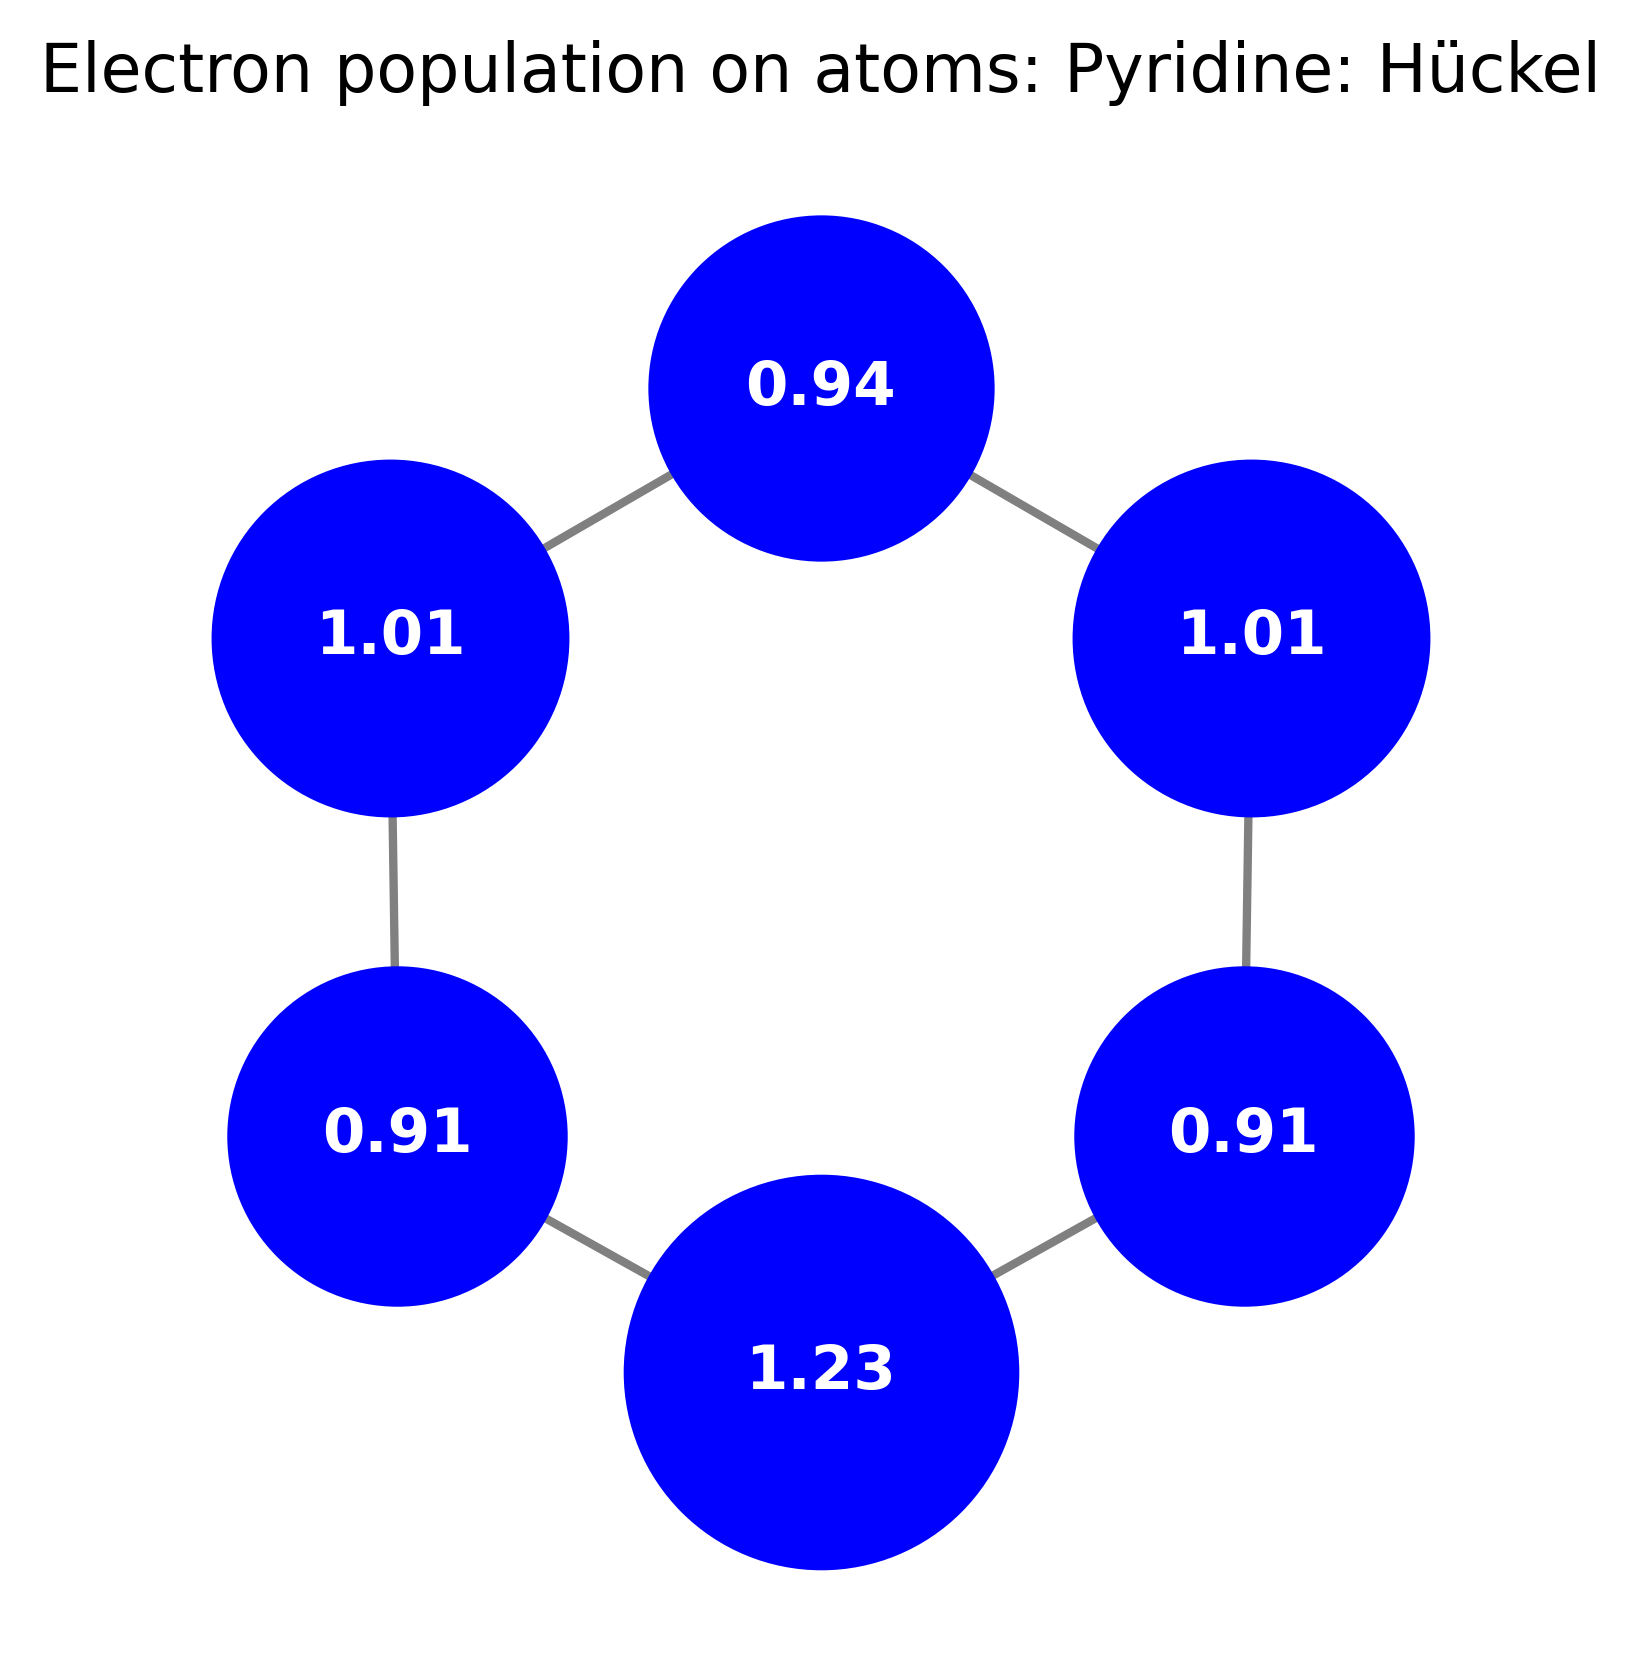

In [249]:
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_huckel, 'Pyridine', 'Hückel')

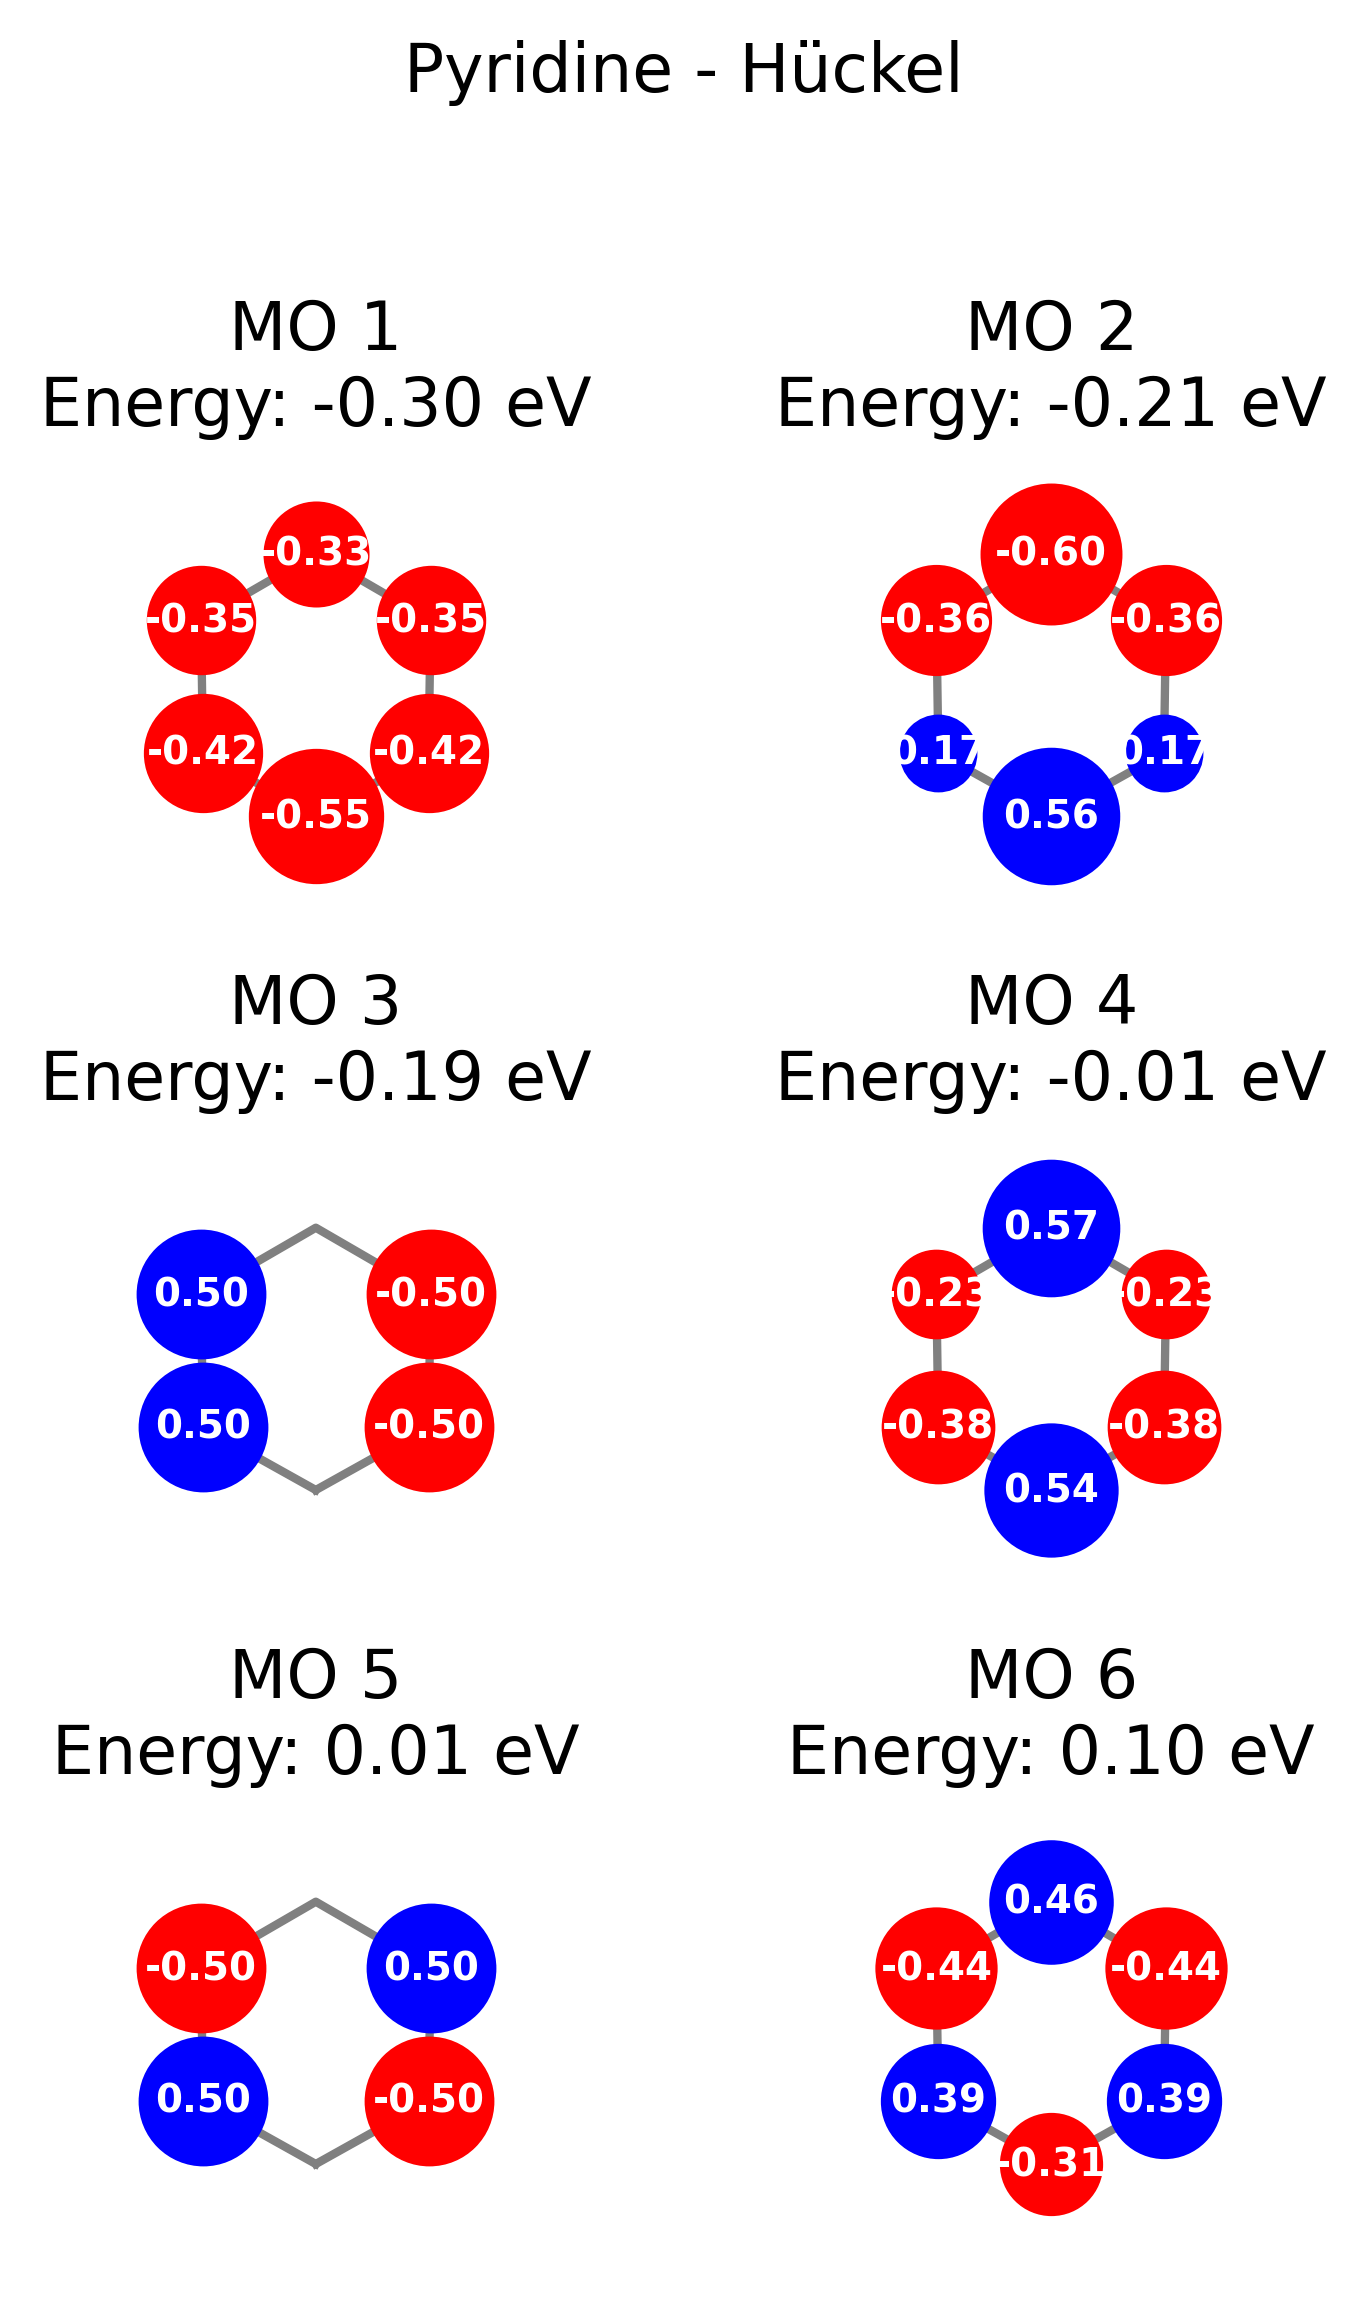

In [250]:
pts.plot_MOs(eigval, eigvec, coordinates, extra_bounds, 'Pyridine', 'Hückel', fig_size = (4,6))

## EHT

In [251]:
IP = {
    'H 1s': 13.6,
    'C 2s': 21.4, 'C 2p': 11.4,
    'N 2s': 25.58, 'N 2p': 13.9,
    'O 2s': 32.38, 'O 2p': 15.85,
    'F 2s': 40.20, 'F 2p': 18.66
}
K = 1.75

In [252]:
print(Pyridine_molecule.ao_labels())
indices_valence_orbitals = pts.taking_indices(Pyridine_molecule, IP.keys())
print(indices_valence_orbitals)
valence_orbitals = [label for index,label in enumerate(Pyridine_molecule.ao_labels()) if index in indices_valence_orbitals]
print(valence_orbitals)
alg_valence_orbitals = [label[2::].lstrip()[:4] for label in valence_orbitals]
pz_indices_full = [i for i, label in enumerate(valence_orbitals) for a in ['C 2pz', 'N 2pz'] if a in label]

print(alg_valence_orbitals)
print(pz_indices_full)

['0 C 1s    ', '0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 N 1s    ', '5 N 2s    ', '5 N 2px   ', '5 N 2py   ', '5 N 2pz   ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ']
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34]
['0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 N 2s    ', '5 N 2px   ', '5 N 2py   ', '5 N 2pz   ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ', '10 H 

In [253]:
n = len(indices_valence_orbitals)
print(n)
EHT_full = np.zeros((n,n))

29


In [267]:
for i, label in enumerate(alg_valence_orbitals):
    alpha = IP[label] 
    EHT_full[i, i] = -alpha 


In [255]:
S_full = hf.get_ovlp()[indices_valence_orbitals][:, indices_valence_orbitals]
for i in range(n):
    for j in range(n):
        if i != j:
            EHT_full[i, j] = EHT_full[j, i] = K*S_full[i,j]*(EHT_full[i,i]+EHT_full[j,j])/2

In [256]:
A = fractional_matrix_power(S_full, -0.5)
A = np.asarray(A)
ASA = A@S_full@A

In [257]:
H_p = A @ EHT_full @ A 
eigenvalues_full, C_p = np.linalg.eigh(H_p)

print(eigenvalues_full)
C = A @ C_p

for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]


C_0 = C[pz_indices_full,:].round(6)
print(C_0[:, [8, 12,14,15,16,17]])

[-30.26875145 -26.7394725  -25.71903386 -20.41907002 -20.38547817
 -17.22843876 -16.34697885 -15.28467809 -15.15601336 -14.77327552
 -14.75882488 -13.70812949 -13.39068439 -12.73168249 -12.68222319
  -9.58957456  -8.84196944  -6.3230746    1.75661893   3.58655941
   7.24736221   7.48562417   8.36510321   9.80011986  16.99896067
  17.4678855   24.65466779  28.57890168  39.65572036]
[[ 0.359897  0.011426  0.498383 -0.424965 -0.501612 -0.378271]
 [ 0.172749  0.452206  0.501612 -0.191324  0.498383  0.453718]
 [ 0.128876  0.626898  0.        0.572121  0.       -0.475049]
 [ 0.172749  0.452206 -0.501612 -0.191324 -0.498383  0.453718]
 [ 0.359897  0.011426 -0.498383 -0.424965  0.501612 -0.378271]
 [ 0.815263 -0.444699  0.        0.488138  0.        0.276464]]


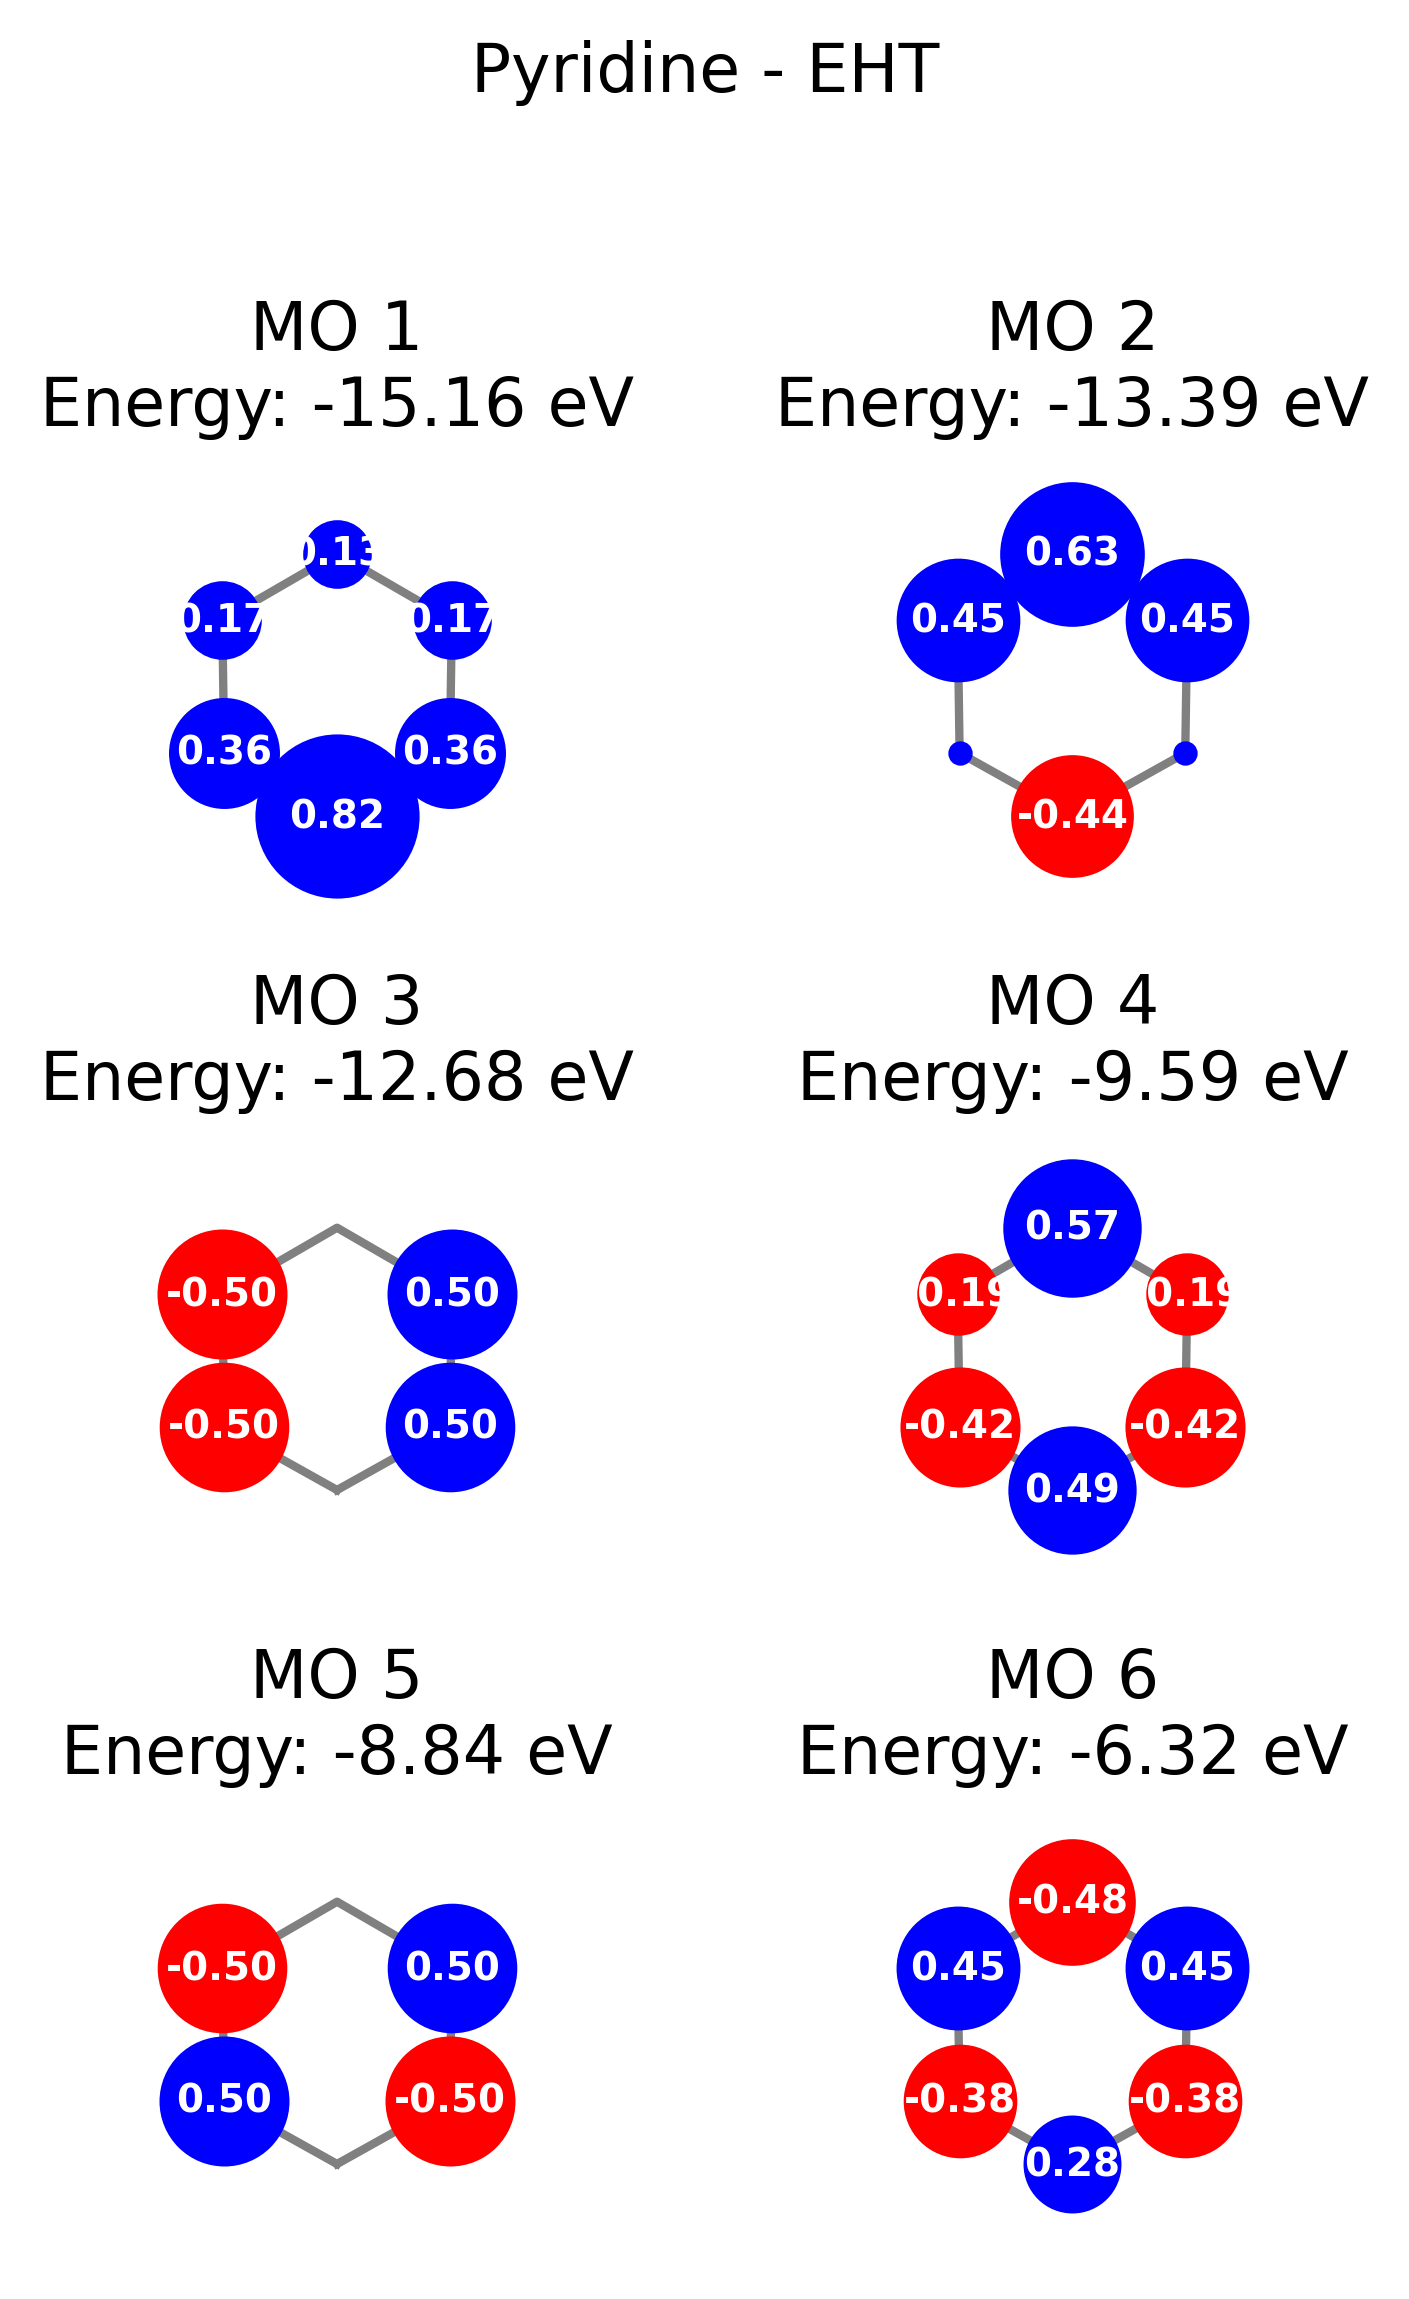

In [258]:
pts.plot_MOs(eigenvalues_full[[8, 12,14,15,16,17]], C_0[:, [8, 12,14,15,16,17]], coordinates, extra_bounds, 'Pyridine', 'EHT', (4,6))

In [259]:
D_EHT = pts.making_D(C, 30)
print(D_EHT)

[[ 1.30148390e+00  1.36772985e-01  5.58181585e-02  2.78091326e-16
   3.43105150e-01 -2.72306753e-02 -3.65048722e-01 -2.41418880e-16
  -1.02318406e-01 -9.62783030e-02  7.00044226e-02 -3.50287695e-16
  -6.97031346e-02 -6.45413397e-02  4.03002125e-02  1.26027538e-16
  -1.45278170e-01 -1.39320393e-01  5.71262785e-02  1.33613611e-17
   3.27631996e-01  3.43536838e-01  1.99447744e-01 -1.40102904e-16
   4.37735571e-01 -1.99319305e-01 -8.36674759e-03  1.25068576e-02
  -1.13232176e-02]
 [ 1.36772985e-01  6.53624148e-01 -9.04068334e-02 -1.85720492e-15
  -1.15872315e-02  2.31234973e-02  1.09609560e-02 -1.87397412e-16
   9.60804474e-03 -3.20507733e-03 -4.07474436e-04  5.65505645e-16
   7.17816004e-02  3.56956732e-02 -5.89803839e-02 -5.83160339e-18
   1.39320393e-01  1.12561473e-01 -3.15906157e-02 -1.38988666e-15
  -3.14456914e-01 -5.13525491e-01 -1.93981151e-01 -3.40086361e-15
   6.44048532e-01 -3.65109518e-02  8.52375920e-03 -5.76158288e-03
  -4.33786118e-02]
 [ 5.58181585e-02 -9.04068334e-02  7.0

In [260]:
D_pz = D_EHT[pz_indices_full][:, pz_indices_full]
print(D_pz)
print(sum(np.diag(D_pz)))

[[ 0.75608387  0.63466706  0.10709001 -0.36531208 -0.23745741  0.57666002]
 [ 0.63466706  0.97189469  0.61150038 -0.03456403 -0.36531208 -0.12051971]
 [ 0.10709001  0.61150038  0.81921924  0.61150038  0.10709001 -0.34742591]
 [-0.36531208 -0.03456403  0.61150038  0.97189469  0.63466706 -0.12051971]
 [-0.23745741 -0.36531208  0.10709001  0.63466706  0.75608387  0.57666002]
 [ 0.57666002 -0.12051971 -0.34742591 -0.12051971  0.57666002  1.72482364]]
5.999999999999999


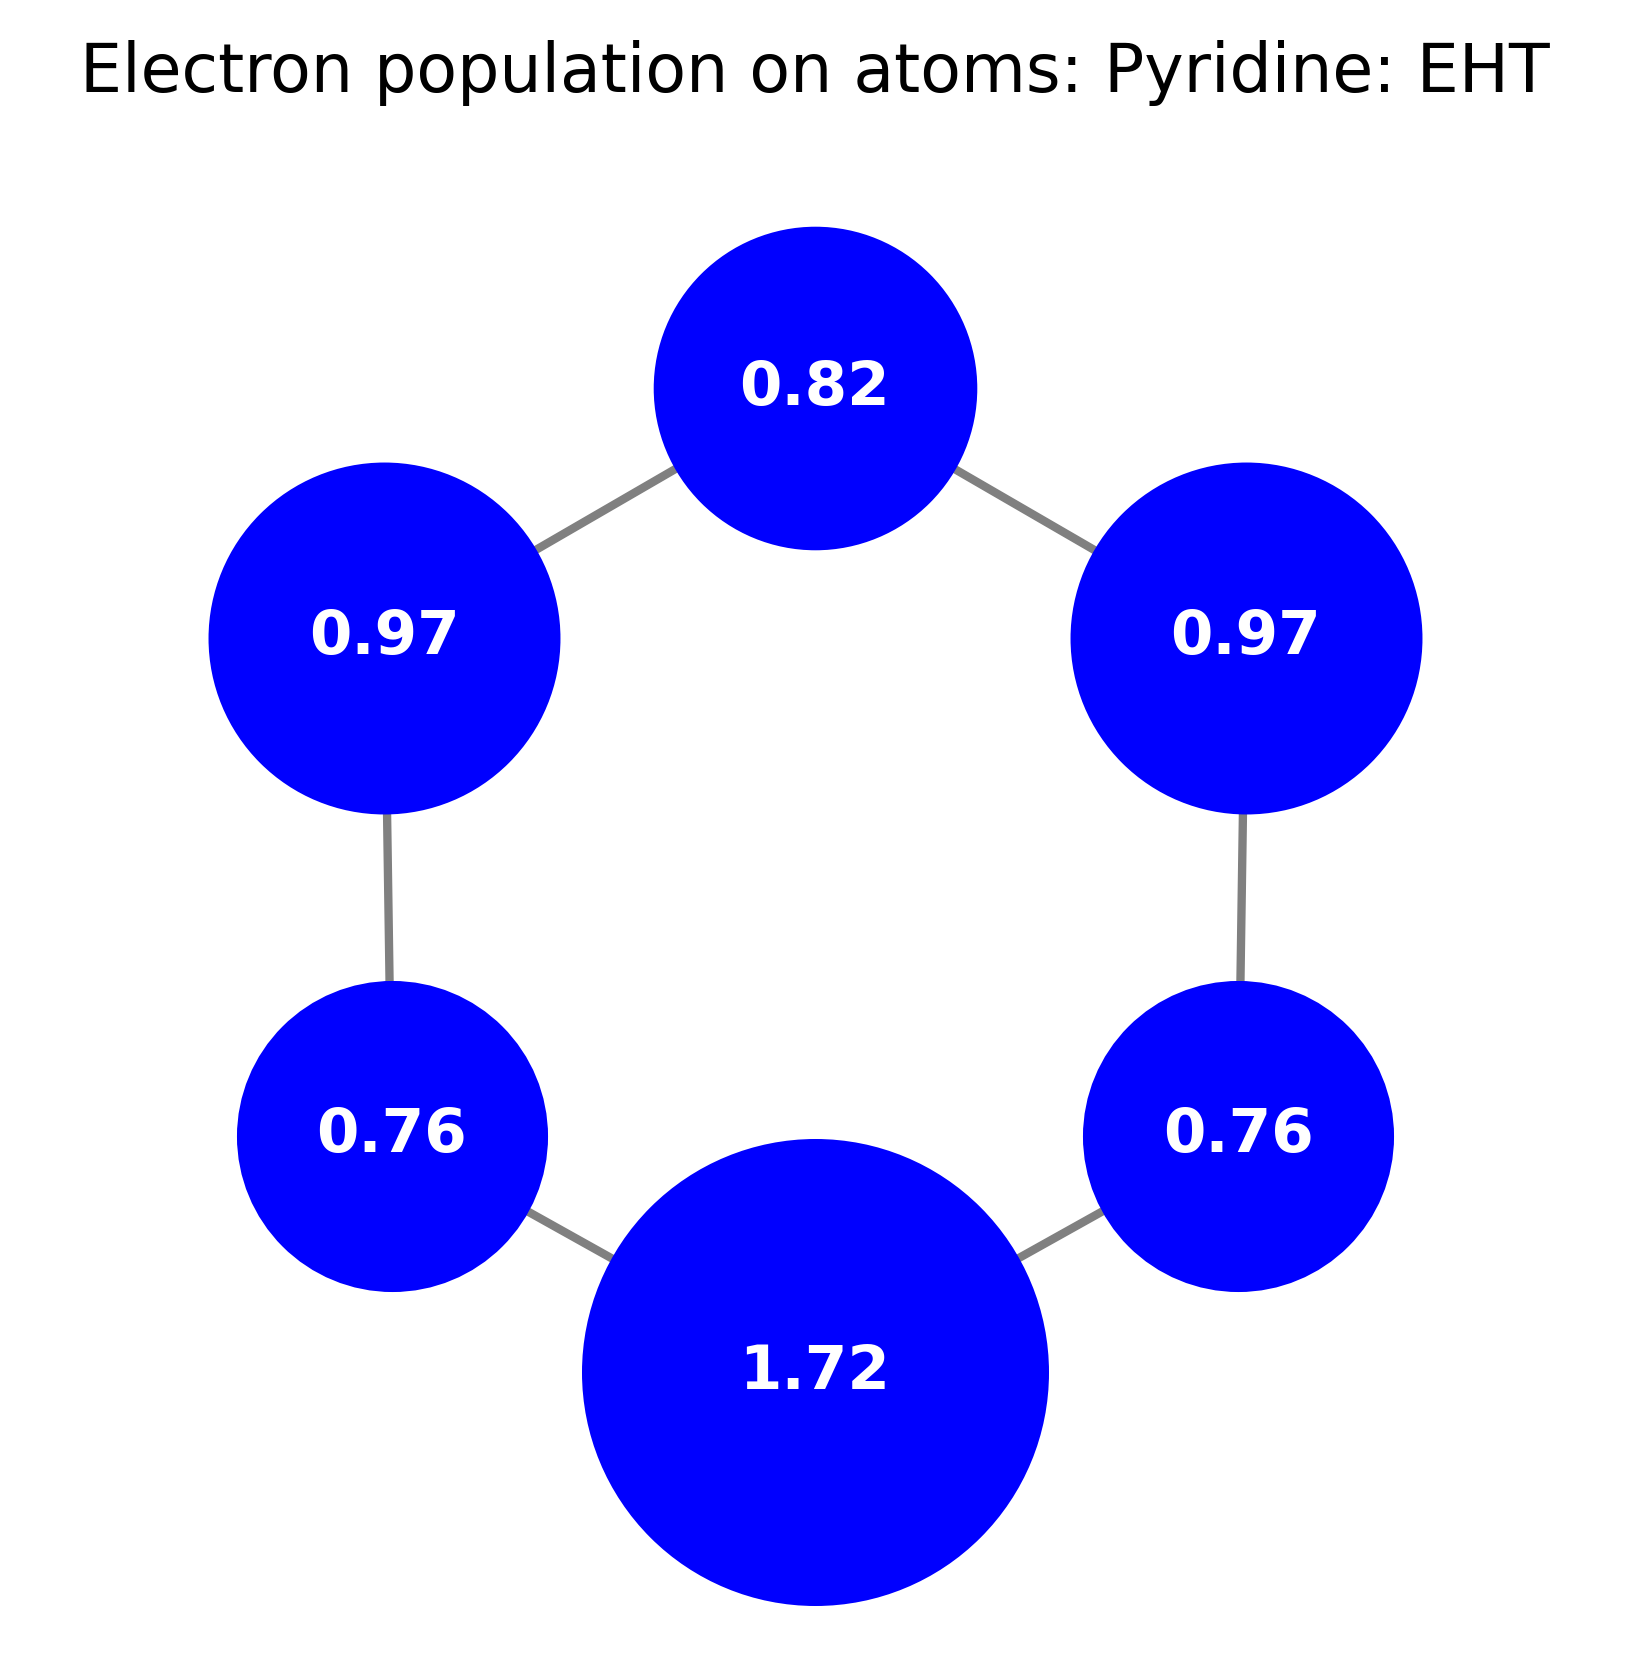

In [261]:
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_pz, 'Pyridine', 'EHT')

In [262]:
D_pz2 = pts.making_D(C_0[:, [8, 12,14,15,16,17]], 6)
print(D_pz2)
print(sum(np.diag(D_pz2)))

[[ 0.75608404  0.63466729  0.10709004 -0.36531228 -0.23745842  0.57665915]
 [ 0.63466729  0.97189416  0.61150047 -0.03456423 -0.36531228 -0.12051938]
 [ 0.10709004  0.61150047  0.81922025  0.61150047  0.10709004 -0.34742616]
 [-0.36531228 -0.03456423  0.61150047  0.97189416  0.63466729 -0.12051938]
 [-0.23745842 -0.36531228  0.10709004  0.63466729  0.75608404  0.57665915]
 [ 0.57665915 -0.12051938 -0.34742616 -0.12051938  0.57665915  1.72482192]]
5.999998574119999


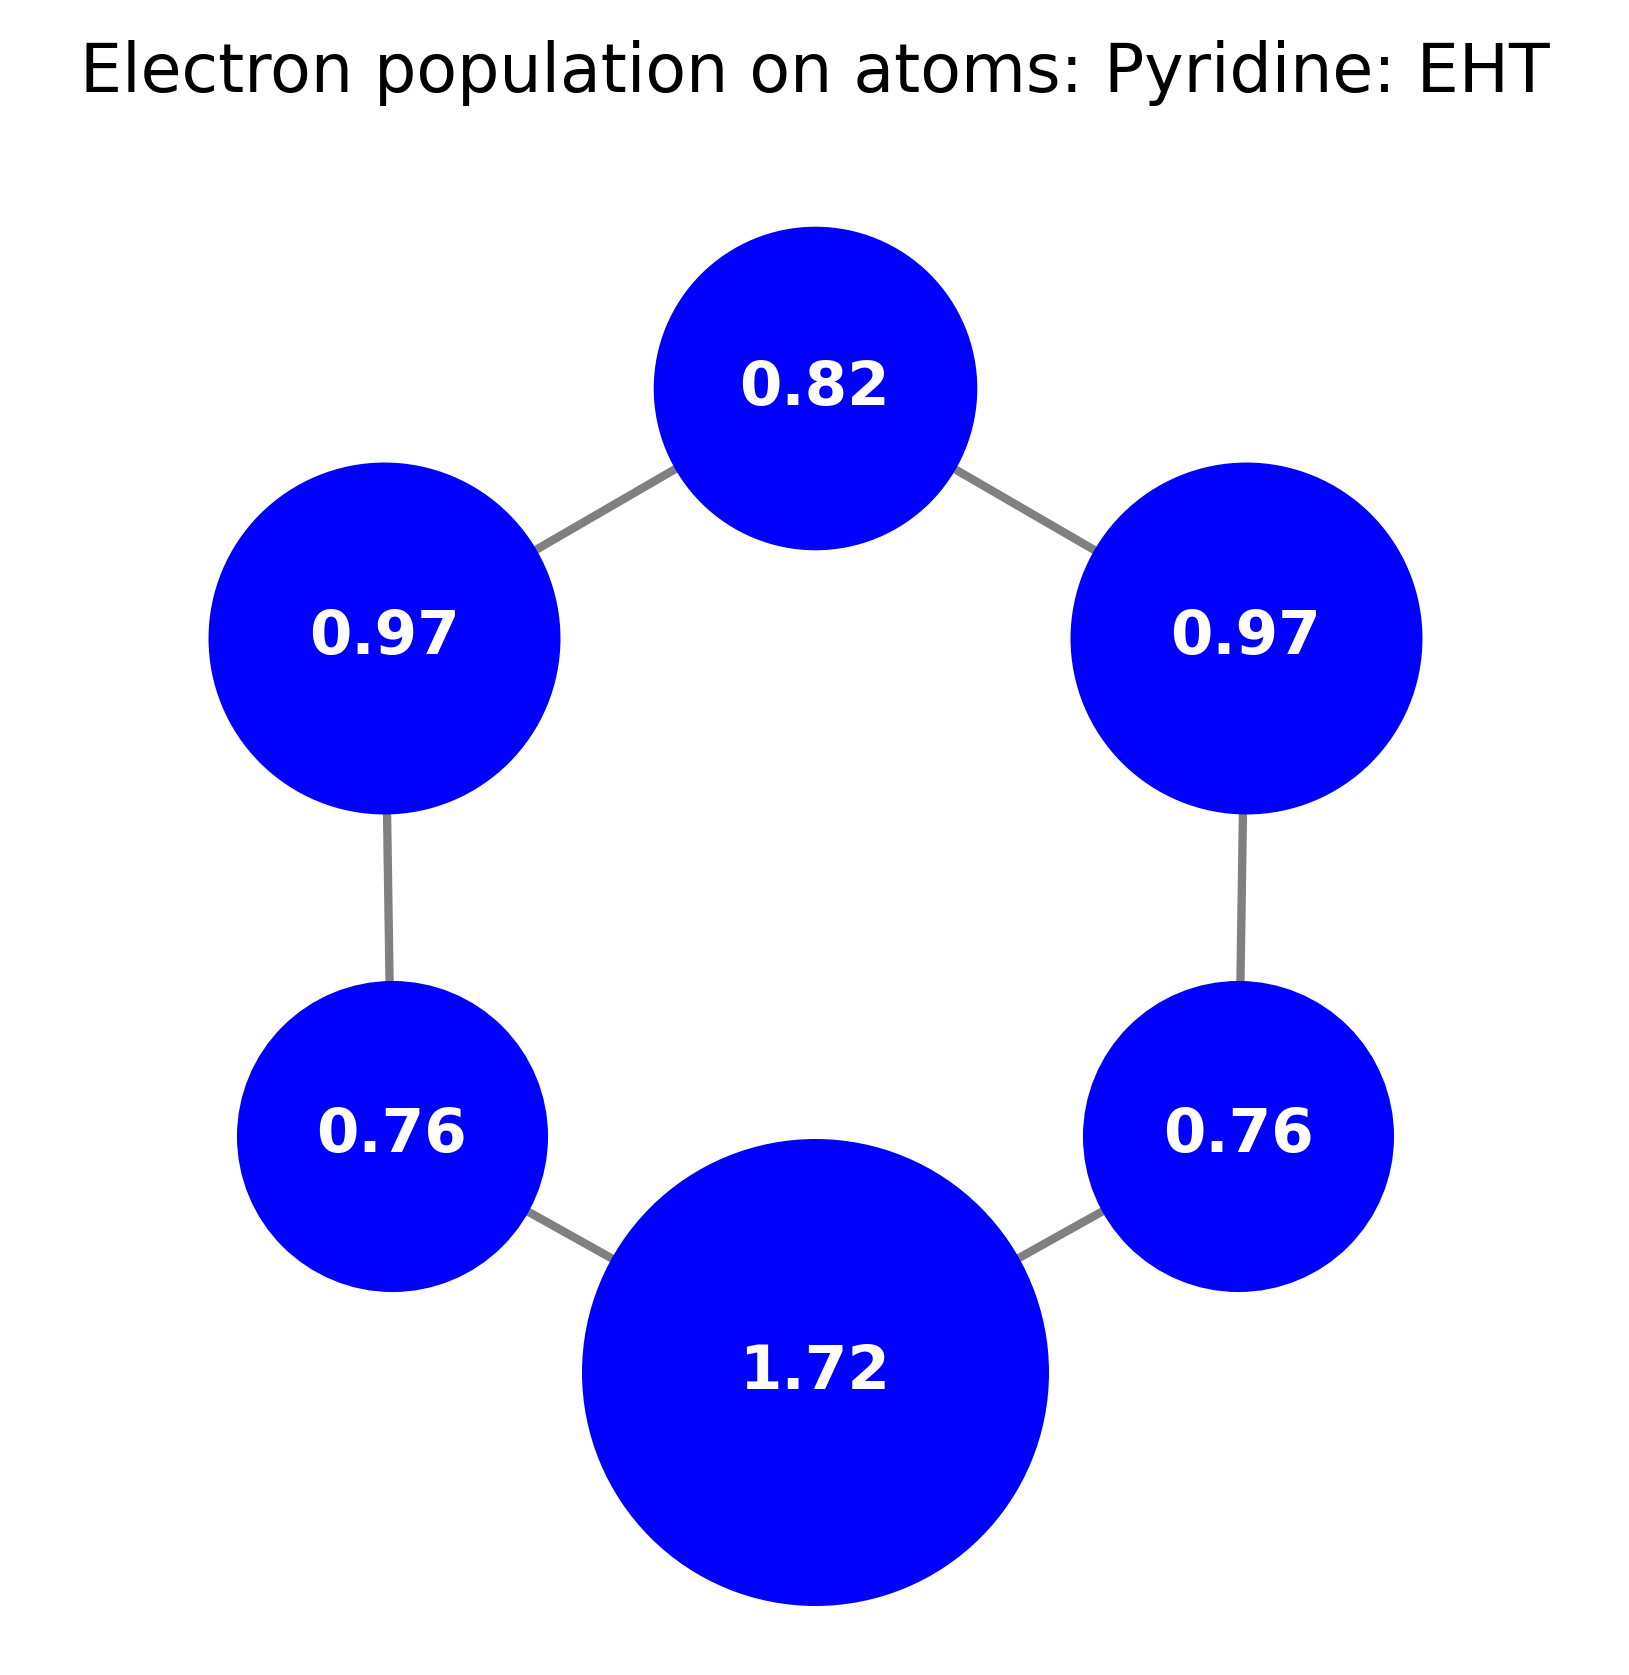

In [263]:
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_pz2, 'Pyridine', 'EHT')